# Qubit visualizations


What are the possible states our qubit can be in and how can we build up a visual cue to help us make sense of quantum states and their evolution?

We know our qubit can have 2 distinct states: $\ket{0}$ and $\ket{1}$. Maybe we need a 1 dimensional line whose vertices can represent each of the aforementioned states. 

We also know that qubits' can be in an equal superposition states: $\ket{+}$ and $\ket{-}$. This now forces us to extend our 1-D line to a 2-D cartesian coordinate system. 

Later, we will learn the existence of states that can be represented with $\ket{+i}$ and $\ket{-i}$, this calls for a 3-D extension. 

It turns out that a sphere is able to depict all the possible states of a single qubit as shown in figure below: 

<img src="images/Bloch_sphere.png" alt="Bloch Sphere" width="300" height="300">



Let us try to showcase the functionality to render such a 3D representation with CUDA-Q.

First, let us define a single-qubit kernel that returns a different state each time. This kernel uses random rotations.

Note: CUDA-Q uses the [QuTiP](https://qutip.org) library to render Bloch spheres. The following code will throw an error if QuTiP is not installed. 

In [1]:
# install `qutip` in the current Python kernel. Skip this if `qutip` is already installed.
# `matplotlib` is required for all visualization tasks.
# Make sure to restart your kernel if you execute this!
# In a Jupyter notebook, go to the menu bar > Kernel > Restart Kernel.
# In VSCode, click on the Restart button in the Jupyter toolbar.

# The '\' before the '>' operator is so that the shell does not misunderstand
# the '>' qualifier for the bash pipe operation.

import sys

try:
    import matplotlib.pyplot as plt
    import qutip

except ImportError:
    print("Tools not found, installing. Please restart your kernel after this is done.")
    !{sys.executable} -m pip install qutip\>=5 matplotlib\>=3.5
    print("\nNew libraries have been installed. Please restart your kernel!")


Tools not found, installing. Please restart your kernel after this is done.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/28.0 MB 2.6 MB/s eta 0:00:11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/28.0 MB 4.1 MB/s eta 0:00:07

     ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.7/28.0 MB 4.8 MB/s eta 0:00:06

     ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.9/28.0 MB 5.2 MB/s eta 0:00:06

     ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/28.0 MB 5.5 MB/s eta 0:00:05

     ━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/28.0 MB 5.7 MB/s eta 0:00:05

     ━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/28.0 MB 6.0 MB/s eta 0:00:05

     ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/28.0 MB 6.2 MB/s eta 0:00:05

     ━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/28.0 MB 6.3 MB/s eta 0:00:04

     ━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/28.0 MB 6.6 MB/s eta 0:00:04

     ━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/28.0 MB 6.8 MB/s eta 0:00:04

     ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/28.0 MB 7.1 MB/s eta 0:00:04

     ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/28.0 MB 7.1 MB/s eta 0:00:04

     ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/28.0 MB 7.1 MB/s eta 0:00:04

     ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/28.0 MB 7.1 MB/s eta 0:00:04

     ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/28.0 MB 7.1 MB/s eta 0:00:04

     ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/28.0 MB 7.1 MB/s eta 0:00:04

     ━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/28.0 MB 5.3 MB/s eta 0:00:05

     ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/28.0 MB 5.5 MB/s eta 0:00:05

     ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/28.0 MB 5.8 MB/s eta 0:00:04

     ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/28.0 MB 6.0 MB/s eta 0:00:04

     ━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/28.0 MB 6.1 MB/s eta 0:00:04

     ━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/28.0 MB 6.5 MB/s eta 0:00:04

     ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/28.0 MB 6.6 MB/s eta 0:00:04

     ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/28.0 MB 6.9 MB/s eta 0:00:03

     ━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/28.0 MB 7.1 MB/s eta 0:00:03

     ━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/28.0 MB 7.4 MB/s eta 0:00:03

     ━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/28.0 MB 7.7 MB/s eta 0:00:03

     ━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━ 11.4/28.0 MB 8.3 MB/s eta 0:00:02

     ━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━ 11.9/28.0 MB 8.5 MB/s eta 0:00:02

     ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━ 12.9/28.0 MB 9.0 MB/s eta 0:00:02

     ━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━ 13.5/28.0 MB 9.2 MB/s eta 0:00:02

     ━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━ 14.5/28.0 MB 12.6 MB/s eta 0:00:02

     ━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━ 15.1/28.0 MB 12.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━ 16.2/28.0 MB 13.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━ 16.8/28.0 MB 13.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━ 17.9/28.0 MB 14.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━ 18.5/28.0 MB 14.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━ 19.1/28.0 MB 15.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━ 20.4/28.0 MB 15.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━ 21.0/28.0 MB 16.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━ 22.3/28.0 MB 16.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 22.9/28.0 MB 17.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━ 24.4/28.0 MB 17.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 25.1/28.0 MB 18.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━ 26.5/28.0 MB 18.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━ 27.2/28.0 MB 18.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 28.0/28.0 MB 19.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 28.0/28.0 MB 19.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 15.6 MB/s eta 0:00:00



New libraries have been installed. Please restart your kernel!


In [2]:
import cudaq
import numpy as np

## Retry the subsequent cells by setting the target to density matrix simulator.
# cudaq.set_target("density-matrix-cpu")


@cudaq.kernel
def kernel(angles: np.ndarray):
    qubit = cudaq.qubit()
    rz(angles[0], qubit)
    rx(angles[1], qubit)
    rz(angles[2], qubit)


Next, we instantiate a random number generator, so we can get random outputs. We then create 4 random single-qubit states by using `cudaq.add_to_bloch_sphere()` on the output state obtained from the random kernel.

In [3]:
rng = np.random.default_rng()
blochSphereList = []
for _ in range(4):
    angleList = rng.random(3) * 2 * np.pi
    sph = cudaq.add_to_bloch_sphere(cudaq.get_state(kernel, angleList))
    blochSphereList.append(sph)


We can display the spheres with `cudaq.show()`. Show the first sphere:

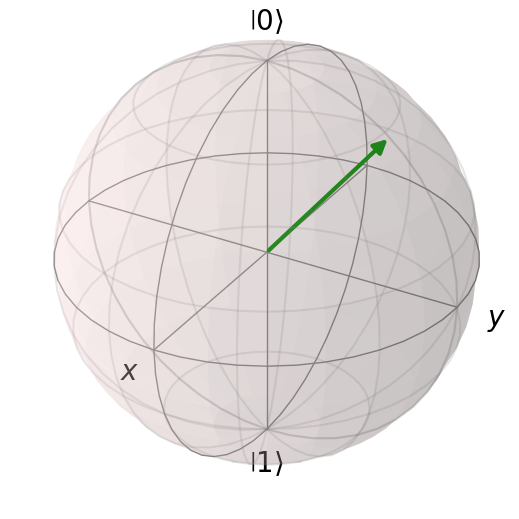

In [4]:
cudaq.show(blochSphereList[0])

We can also show multiple Bloch spheres side by side - simply set the `nrows` and `ncols` in the call to `cudaq.show()` accordingly. Make sure to have more spaces than spheres in your list, else it will throw an error! Let us show two spheres in a row:

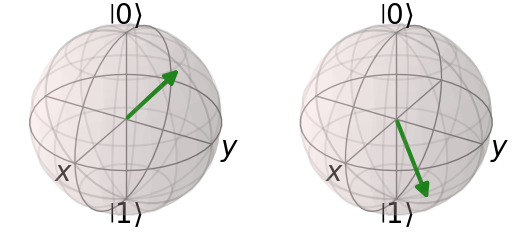

In [5]:
cudaq.show(blochSphereList[:2], nrows=1, ncols=2)

We can show them in a column too, if we want! Simply set the `nrows = 2` and `ncols = 1`.

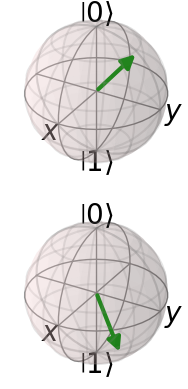

In [6]:
cudaq.show(blochSphereList[:2], nrows=2, ncols=1)

Can we show the entire list of 4 Bloch spheres we created? Absolutely!

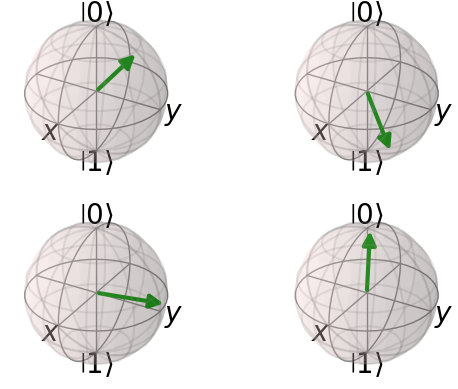

In [7]:
cudaq.show(blochSphereList[:], nrows=2, ncols=2)

What if we had to add multiple vectors to a single Bloch sphere? CUDA-Q uses the [QuTiP](https://www.qutip.org) toolbox to construct Bloch spheres. We can then add multiple states to the same Bloch sphere by passing the sphere object as an argument to `cudaq.add_to_bloch_sphere()`.

In [8]:
import qutip

rng = np.random.default_rng()
blochSphere = qutip.Bloch()
for _ in range(10):
    angleList = rng.random(3) * 2 * np.pi
    sph = cudaq.add_to_bloch_sphere(cudaq.get_state(kernel, angleList), blochSphere)


This created a single Bloch sphere with 10 random vectors. Let us see how it looks.

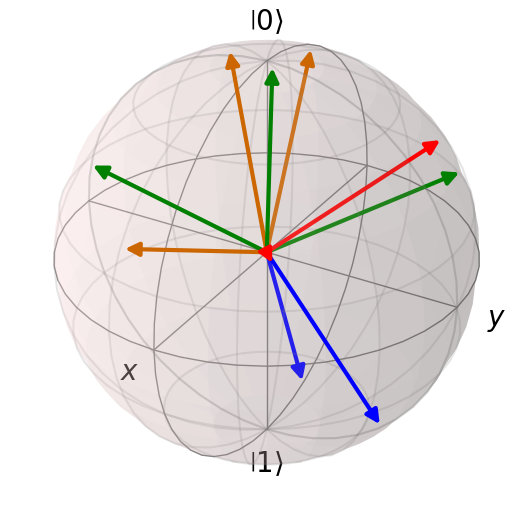

In [9]:
blochSphere.show()